In [1]:
import pandas as pd
data = pd.read_csv('/Users/vladamalkina/Downloads/intern_task.csv')
print(data.head())

   rank  query_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0     0        10        1.0        0.0        1.0        3.0        3.0   
1     1        10        3.0        0.0        3.0        0.0        3.0   
2     0        10        3.0        0.0        2.0        0.0        3.0   
3     1        10        3.0        0.0        3.0        0.0        3.0   
4     2        10        3.0        0.0        3.0        1.0        3.0   

   feature_5  feature_6  feature_7  ...  feature_134  feature_135  \
0   0.333333        0.0   0.333333  ...          0.0     0.000000   
1   1.000000        0.0   1.000000  ...          0.0     0.000000   
2   1.000000        0.0   0.666667  ...          0.0     0.000000   
3   1.000000        0.0   1.000000  ...          0.0     0.000000   
4   1.000000        0.0   1.000000  ...        273.0    79.670665   

   feature_136  feature_137  feature_138  feature_139  feature_140  \
0     0.454545     0.890238     8.655534     1.000000     

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 262.1 MB


In [3]:
data.isna().sum()

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64

In [4]:
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 263.8 MB


In [6]:
grouped_df = data.groupby(['rank'])['feature_0'].agg(['mean', 'median', 'std', 'min', 'max'])
print(grouped_df)

          mean  median       std  min   max
rank                                       
0     1.951638     2.0  1.316324  0.0  31.0
1     1.863127     2.0  1.130290  0.0  10.0
2     1.924224     2.0  1.163265  0.0   9.0
3     1.748159     2.0  1.254938  0.0   9.0
4     1.456461     1.0  1.083458  0.0   6.0


In [7]:
grouped_df = data.groupby(['rank'])['feature_1'].agg(['mean', 'median', 'std', 'min', 'max'])
print(grouped_df)

          mean  median       std  min   max
rank                                       
0     0.154492     0.0  0.491816  0.0  18.0
1     0.233146     0.0  0.608707  0.0   5.0
2     0.324632     0.0  0.739677  0.0   9.0
3     0.323117     0.0  0.743566  0.0   7.0
4     0.193566     0.0  0.639716  0.0   5.0


In [8]:
grouped_df = data.groupby(['rank'])['feature_2'].agg(['mean', 'median', 'std', 'min', 'max'])
print(grouped_df)

          mean  median       std  min   max
rank                                       
0     1.000609     1.0  0.991479  0.0  27.0
1     1.335514     1.0  1.011192  0.0   9.0
2     1.534629     2.0  1.094192  0.0   9.0
3     1.391780     1.0  1.196175  0.0   9.0
4     1.245702     1.0  1.045086  0.0   6.0


## количество поисковых сессий:

In [9]:
len(data['query_id'].unique())

2000

## id поисковых сессий:

In [10]:
data['query_id'].unique()

array([   10,    25,    40, ..., 29965, 29980, 29995])

## длина 1 поисковой сессии

In [11]:
len(data[data['query_id'] == 10])

92

In [12]:
data['rank'].unique()

array([0, 1, 2, 4, 3])

## количество записей для каждого ранга

In [13]:
for ind in data['rank'].unique():
    print('for', ind, 'rank', data[data['rank'] == ind].shape)

for 0 rank (121521, 146)
for 1 rank (75815, 146)
for 2 rank (31910, 146)
for 4 rank (1803, 146)
for 3 rank (4209, 146)


###  countplot 'Rank' column

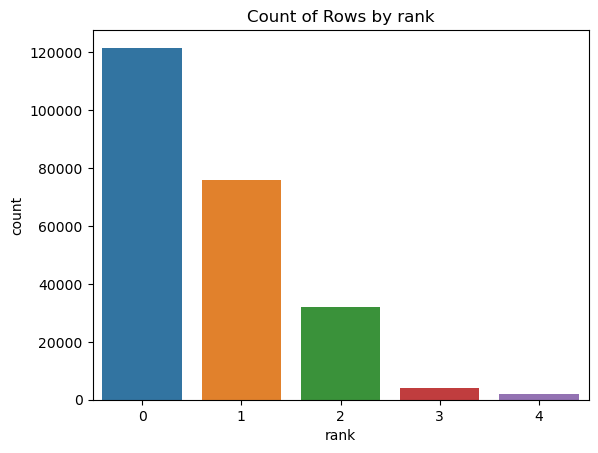

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='rank', data=data)
plt.title('Count of Rows by rank')
plt.xlabel('rank')
plt.ylabel('count')
plt.show()

## Relationship between Features and the Target

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


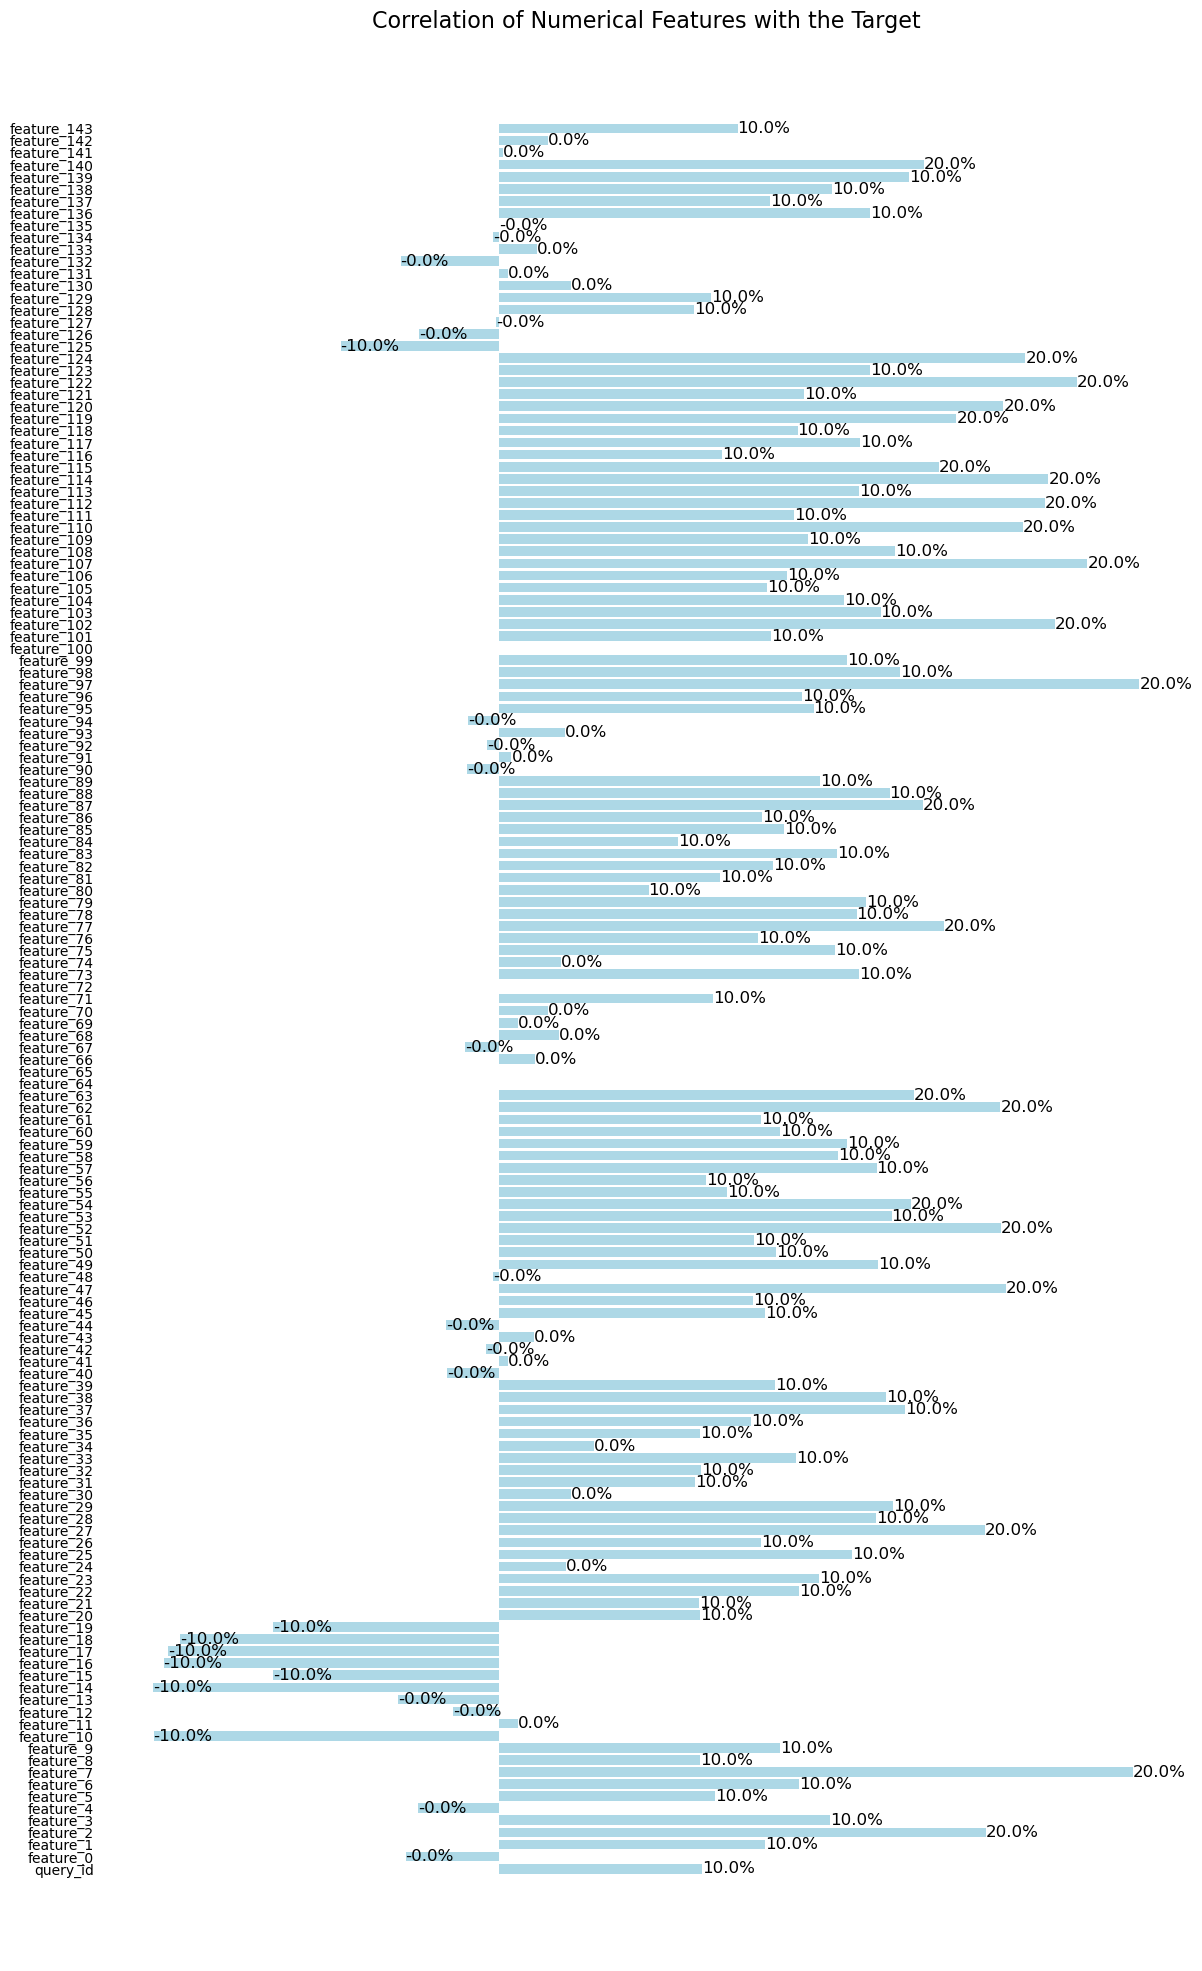

In [15]:
X = data.drop(columns = ['rank'])
targ = X.select_dtypes(include='number').corrwith(data['rank'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]

fig, ax = plt.subplots(figsize=(14, 25))
bars = ax.barh(targ.index, targ.values, color="lightblue")

for bar, label in zip(bars, val):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, label,ha='left', va='center', fontsize=12)

ax.set_title("Correlation of Numerical Features with the Target", fontsize=16)
ax.set_facecolor('none')
ax.tick_params(axis='y', which='both', left=False)

ax.set_xticks([])
ax.set_xticklabels([])

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
plt.show()

### Box plot feature_0

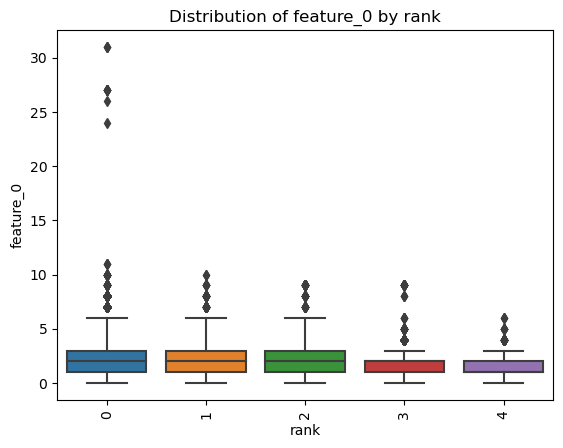

In [16]:
sns.boxplot(x='rank', y='feature_0', data=data)
plt.title('Distribution of feature_0 by rank')
plt.xlabel('rank')
plt.ylabel('feature_0')
plt.xticks(rotation=90)
plt.show()

### finding outliers

In [17]:
X_new = data

In [18]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return (df1.shape[0]+ df2.shape[0])

### удалим выбросы в каждой колонке, если их количество превышает 10000

In [19]:
import pandas as pd
import numpy as np
# Create detect outlier function
def detect_outlier(x):
    quantile1 = x.quantile(0.25)
    quantile3 = x.quantile(0.75)
    iqr = quantile3 - quantile1
    return (x > quantile3 + 1.5*iqr) | (x < quantile1 - 1.5*iqr)

# Create remove outlier function
def remove_outlier(dataframe, columns):
    for col in columns:
        numb = out_iqr(dataframe, col)
        if numb > 10000:
            dataframe = dataframe[~detect_outlier(dataframe[col])]
    
    print("Remove outliers")
    print(dataframe)
    print(dataframe.shape)
    return dataframe

X = remove_outlier(X_new, X_new.columns)
#print(X.shape)

The IQR is 1.0
The lower bound value is -1.5
The upper bound value is 2.5
The IQR is 13365.0
The lower bound value is -11832.5
The upper bound value is 41627.5
The IQR is 2.0
The lower bound value is -2.0
The upper bound value is 6.0
The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
The IQR is 2.0
The lower bound value is -3.0
The upper bound value is 5.0
The IQR is 1.0
The lower bound value is -1.5
The upper bound value is 2.5
The IQR is 2.0
The lower bound value is -2.0
The upper bound value is 6.0
The IQR is 0.333333
The lower bound value is 0.16666750000000002
The upper bound value is 1.4999995
The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
The IQR is 0.75
The lower bound value is -0.875
The upper bound value is 2.125
The IQR is 496.8587544685174
The lower bound value is -493.0437776559253
The upper bound value is 1494.3912402181445
The IQR is 0.0
The lower bound value is 1.0
The upper bound value is 1.0
The IQR is 536.0
The lower bo

In [20]:
y = X['rank']
X = X.drop(columns = ['rank'])

In [21]:
X.shape

(39220, 145)

## матрица корреляции признаков

In [22]:
import numpy as np

In [23]:
def lower_corr_matrix(n_sample, variables, figsize, fontsize):
    corr_matrix = X.sample(n = n_sample, random_state = 42)[variables].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=mask, annot_kws={"fontsize": fontsize})
    plt.show()
    corr_matrix = corr_matrix.where(~mask)
    return corr_matrix

Correlation Matrix (Lower Triangle)


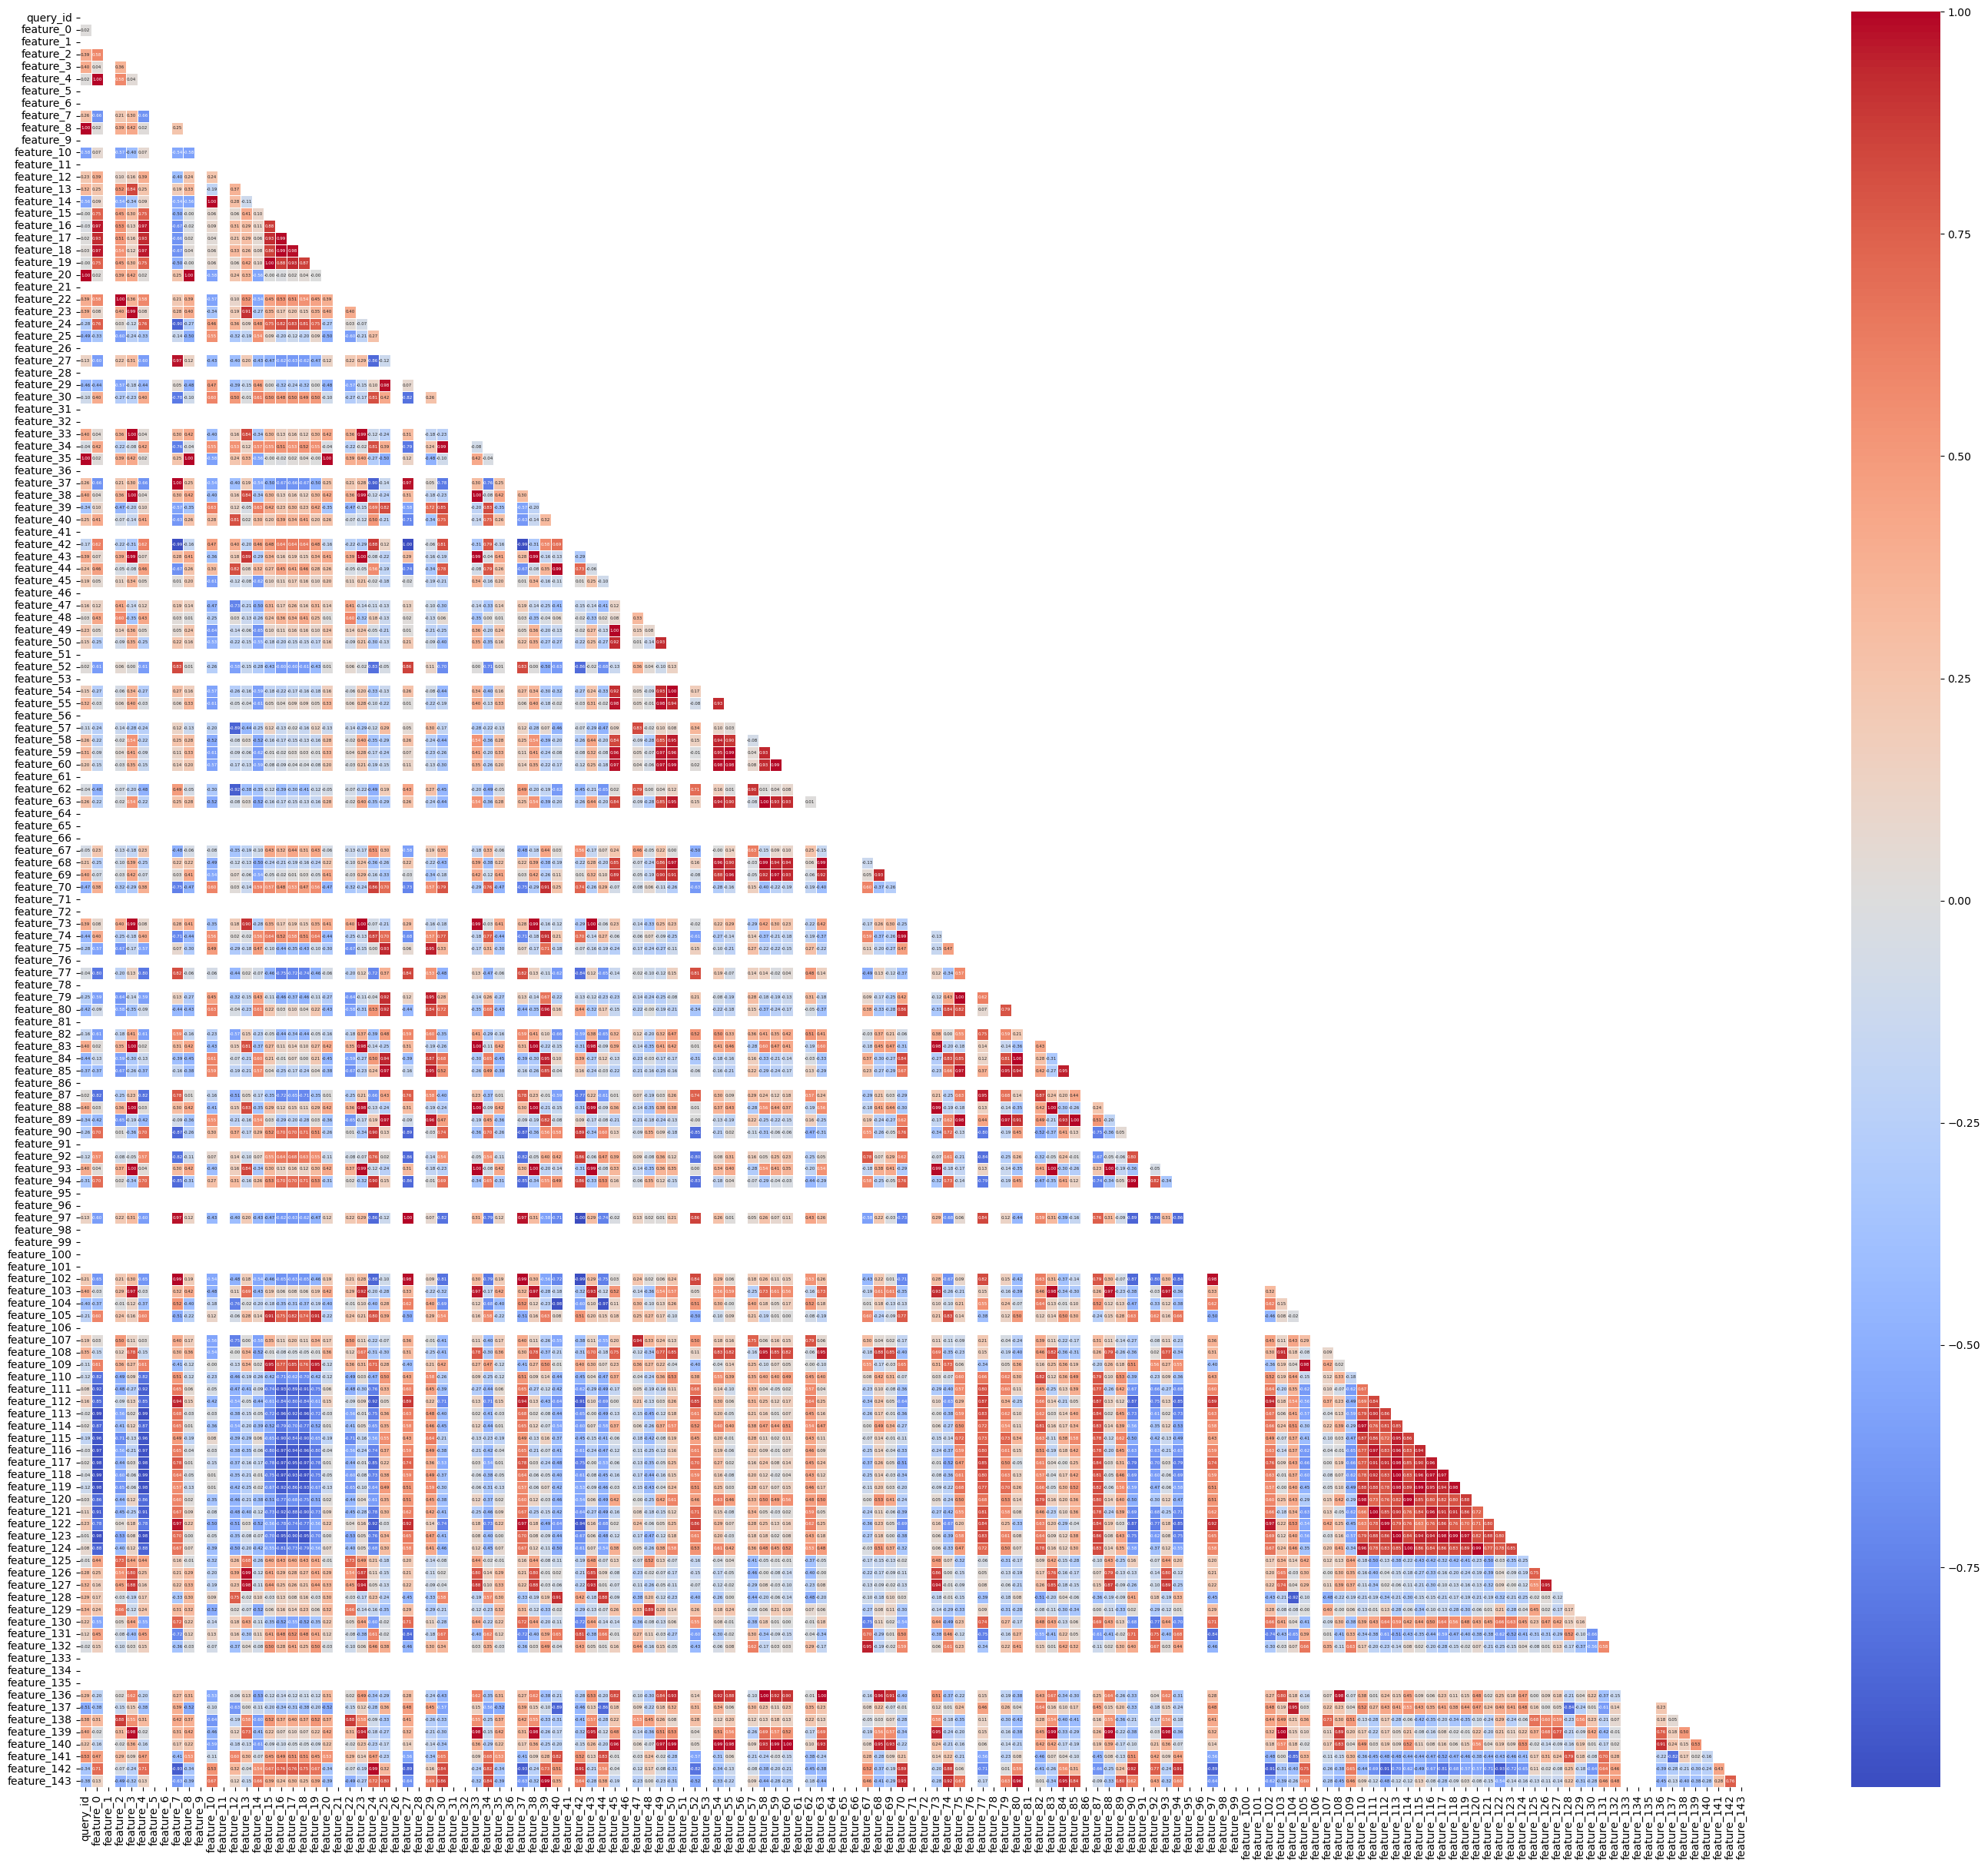

In [24]:
variables = [col for col in X]
print("Correlation Matrix (Lower Triangle)")
corr_matrix = lower_corr_matrix(n_sample = 10, variables = variables, figsize = (35, 30), fontsize = 4)

### признаки с высокой корреляцией

In [25]:
cols = [col for col in X]
corr = X[cols].iloc[:, :].corr()
np.fill_diagonal(corr.values, 0.0)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
highly_correlated_features = corr[np.abs(corr) > 0.9].stack().reset_index()
highly_correlated_features = highly_correlated_features.iloc[abs(highly_correlated_features[0]).argsort()[::-1]].reset_index()
highly_correlated_features

index      level_0      level_1         0
0       19   feature_35   feature_20  1.000000
1       59   feature_97   feature_27  1.000000
2        9   feature_22    feature_2  1.000000
3       20   feature_37    feature_7  1.000000
4        8   feature_20    feature_8  1.000000
..     ...          ...          ...       ...
171     81  feature_110    feature_4 -0.903609
172    140  feature_123  feature_115  0.902471
173     65  feature_103   feature_63  0.901254
174    155  feature_136   feature_38  0.900931
175     29   feature_49   feature_45  0.900537

[176 rows x 4 columns]

In [26]:
def plot_highly_correlated_featuers(features, title, highly_correlated_features):
    fig, axs = plt.subplots(int(len(highly_correlated_features)/4)+(1 if len(highly_correlated_features)%4!=0 else 0),4, figsize=(16,5*(int(len(highly_correlated_features)/4)+(1 if len(highly_correlated_features)%4!=0 else 0))))
    i=0
    for f,g in zip(highly_correlated_features.level_0, highly_correlated_features.level_1):
        ax = axs[int(i/4), i%4] if ((int(len(highly_correlated_features)/4)+(1 if len(highly_correlated_features)%4!=0 else 0))>1) else axs[i%4]
        if(i==7):
            ax.plot(X[features][f], X[features][g], '.')
            ax.set(xlabel=f,ylabel=g)
            ax.text(0.05, 0.9, 'Correlation: {:.4f}'.format(highly_correlated_features[0][i]), transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3",fc="white"))
            ax.tick_params(left=False,bottom=False)
            i = i + 1
            continue

        ax.hexbin(x=f, y=g, data=X[features], bins='log', gridsize=40, cmap='inferno')
        ax.set(xlabel=f,ylabel=g)

        ax.text(0.05, 0.9, 'Correlation: {:.4f}'.format(highly_correlated_features[0][i]), transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3",fc="white"))
        ax.tick_params(left=False,bottom=False)
        i = i + 1

    sns.despine()
    fig.suptitle(f'\n{title})',fontsize=14)
    plt.show()

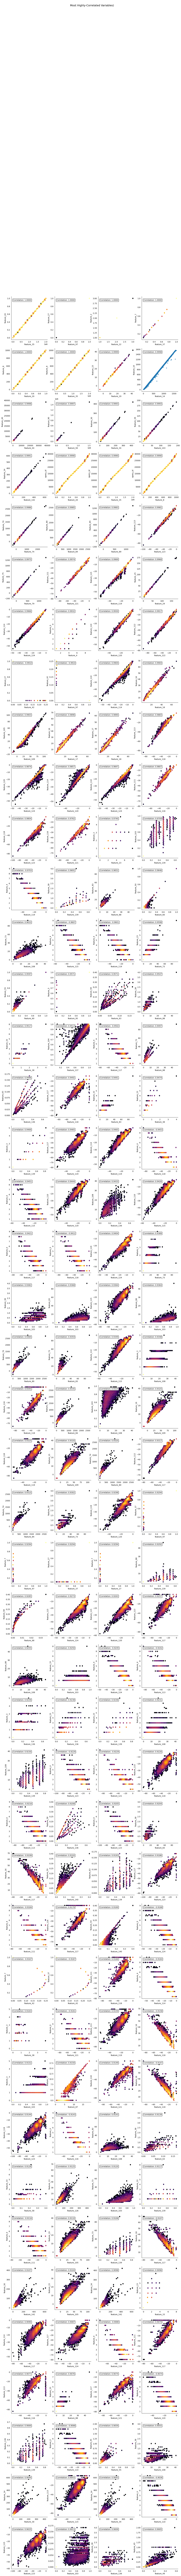

In [27]:
plot_highly_correlated_featuers(X.columns, 'Most Highly-Correlated Variables', highly_correlated_features)

## удалим признаки с высокой корреляцией

In [28]:
def correlation(data, threshold=None):
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
correlated_features = correlation(X, threshold=0.9)
len(set(correlated_features))

62

In [30]:
X.drop(labels=correlated_features, axis=1, inplace=True)
X.shape

(39220, 83)

## обучение моделей

### NDCG Scorer function

In [31]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)
    scores = []
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)
    return np.mean(scores)

ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

### разделим данные на train, val и test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [33]:
X_train.shape, y_train.shape

((23532, 83), (23532,))

In [34]:
X_val.shape, y_val.shape

((7844, 83), (7844,))

In [35]:
X_test.shape, y_test.shape

((7844, 83), (7844,))

### linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
model.intercept_

-0.029812416914012707

In [38]:
pred = model.predict(X_val)

In [39]:
score = ndcg_score(y_val, pred, k=5)
print(score)

0.5043345232024478


### random forest classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
pred = model_2.predict(X_val)

In [42]:
score = ndcg_score(y_val, pred, k=5)
print(score)

0.5043345232024478


### decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
pred = model_3.predict(X_val)

In [45]:
score = ndcg_score(y_val, pred, k=5)
print(score)

0.5043345232024478


###  xgb ranker

In [46]:
import numpy as np
import xgboost as xgb

seed = 1994
qid = X['query_id'].to_numpy()

In [47]:
ranker = xgb.XGBRanker(tree_method="hist", lambdarank_num_pair_per_sample=8, objective="rank:ndcg", lambdarank_pair_method="topk")
ranker.fit(X, y, qid=qid)

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
          importance_type=None, interaction_constraints=None,
          lambdarank_num_pair_per_sample=8, lambdarank_pair_method='topk',
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, ...)

In [48]:
pred = ranker.predict(X_val)
score = ndcg_score(y_val, pred, k=5)
print(score)

0.5043345232024478


In [52]:
pred = ranker.predict(X_test)
score = ndcg_score(y_test, pred, k=5)
print(score)

0.5043345232024478


## ndcg_score полученное во всех моделях 0.5043345232024478    :(